<a href="https://colab.research.google.com/github/DeepakKumarSingh003/Play-store-App-Review-EDA/blob/main/Play_Store_App_Review_EDA_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

<b>App Store</b>. 
App stores or app marketplaces are digital distribution platforms for mobile and desktop apps. They offer online users a plethora of apps to browse through, purchase or download for free - a concept that is proving increasingly successful around the world. 
Only In 2020, over 218 billion apps were downloaded worldwide and numbers are only going to increase.
DO you know there are 3.15Millions Apps available on Google App store.
and annual number of apps downloaded from Google play store is around 111.3 billion. Now Here comes the important part The gross app revenue of google play worldwide is 47.9 billion USD
And an Average consumer spend on mobile apps per smartphone as of 3rd quarter 2021(in U.S. dollars) 5.13USD.

Application Markets is very deep market to be dive in and take the precious pears out.for that we need users views for that companies use Application Review concept.

https://www.statista.com/topics/1729/app-stores/#dossierKeyfigures

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file1_path="/content/drive/MyDrive/Alma better Projects/EDA Capstone project/Copy of Play Store Data.csv"
file2_Path="/content/drive/MyDrive/Alma better Projects/EDA Capstone project/Copy of User Reviews.csv"

In [5]:
store_df=pd.read_csv(file1_path)
Review_Df=pd.read_csv(file2_Path)

<b> Lets see what we have in our Play store App Data set.

In [8]:
store_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<b>Lets check how big it is 

In [15]:
store_df.shape

(10841, 13)

In [9]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<b>It seems as we have big mess in the Rating

In [14]:
store_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<b>Rating of any app can only range  from 1 to 5.still we can see there </b>

1.<b>There is amaximum value of 19.0. This is a outliar</b>
Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors.
To deal with outliar we have to analyse our data.The analysis for outlier detection is referred to as outlier mining.mining!! yes you heard it right mining it is not the way done with coal field but the concept is same we have digg out where outliars are available in our data and then we have opeations to remove them.
Lets start the hunt for outliars. Always Remember when you are going for a hunt always have tools with you.There are lots of tool available you can choose from your convinience. 
we are using a very famous tool boxplot to detect those messy outliars 

2.<b>standard deviation as 0.537</b>.

standard deviation is a measure of the amount of variation or dispersion of a set of values.A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range
https://en.wikipedia.org/wiki/Standard_deviation



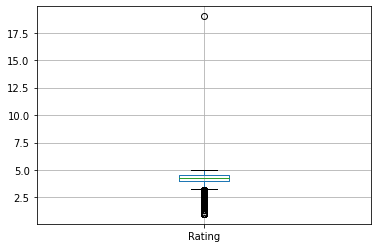

In [16]:
store_df.boxplot();


<b>We got our crrepy creature missing our data and the good thing is it only 1 in number.</b>
 

In [ ]:
store_df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


<b> We have drop this creepy outliar Row it is not much usefull and also only single in number.

In [17]:
store_df.drop([10472], inplace=True)

<b> Lets check now how Rating looks but this time we use histogram 

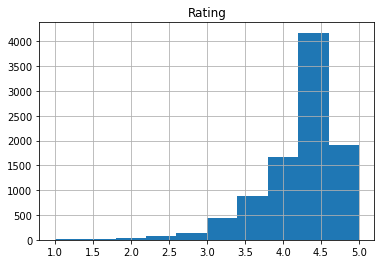

In [23]:
store_df.hist("Rating");

<b>Now we can move ahead and hunt for nulls in our data set 

In [20]:
store_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

<b> So we have maximum null in Rating and few in Type,current ver,Android Ver</b>

1.<b>For Rating we will fill nulls with median 

In [26]:
def fill_Median(column):
  return column.fillna(column.median)


In [31]:
store_df.Rating=store_df["Rating"].transform(fill_Median)
print(store_df.Rating.isnull().sum())

0


In [ ]:
Df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df.shape
# Df.shape

(10841, 13)

In [ ]:
df.describe()
# Df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [33]:
Review_Df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')